In [1]:
# Importing all tolls we need
#Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# MODLES FROM Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evalutions
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve

In [2]:
#Load Data 
df=pd.read_csv("../input/heartdisease/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


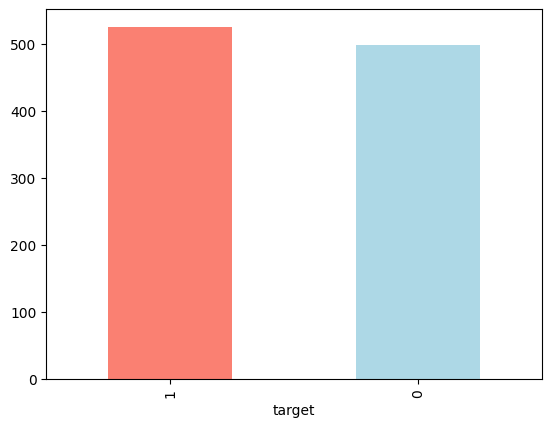

In [3]:
#Data Expolration
df["target"].value_counts()
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"])
df.info()

In [4]:
# Heart disease Frequency according to sex
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [5]:
#Compare target coloum with sex coloum
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


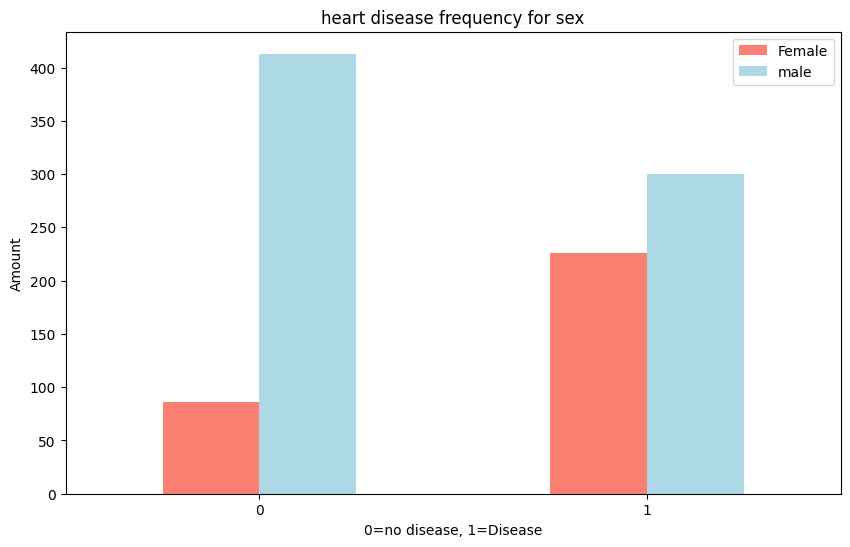

In [6]:
#Create a plot of subplot
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("heart disease frequency for sex")
plt.xlabel("0=no disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","male"])
plt.xticks(rotation=0);

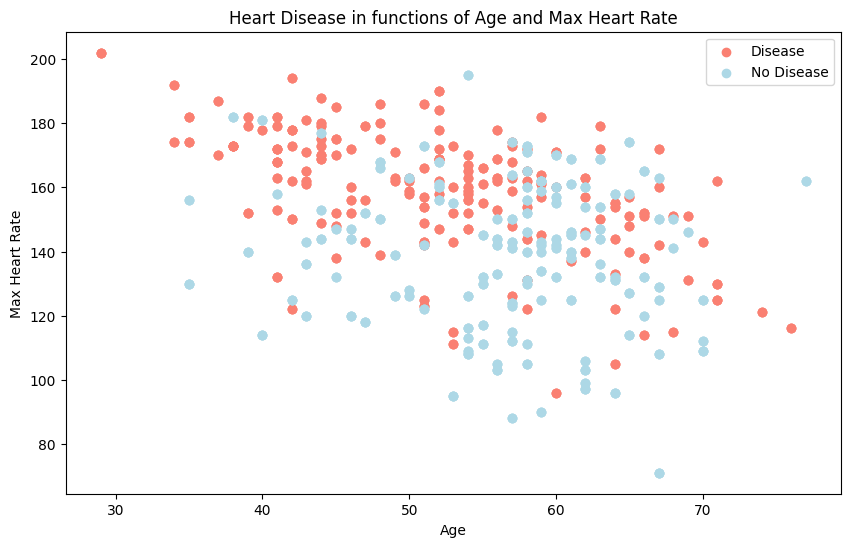

In [7]:
#Age vs Max Heart rate for Heart Disease
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue")

plt.title("Heart Disease in functions of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

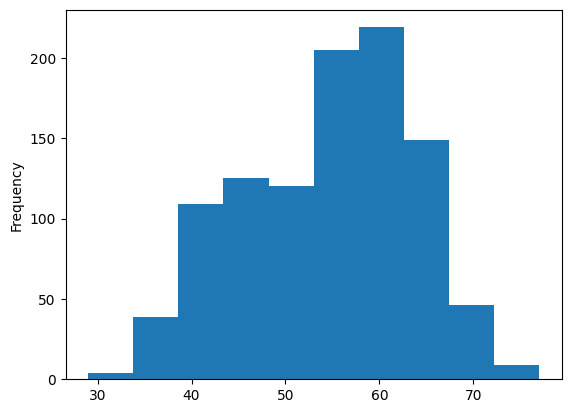

In [8]:
#Check the distribution of age coloum with a histogram
df.age.plot.hist();

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

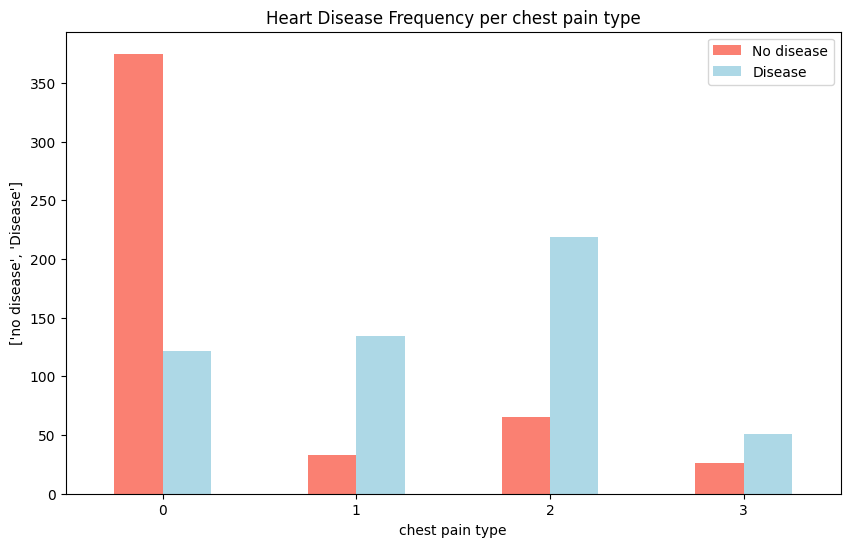

In [9]:
#Heart Disease frequency per chest pain type
pd.crosstab(df.cp,df.target)

pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])

plt.title("Heart Disease Frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel(["no disease", "Disease"])
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0)

In [10]:
#Making a correlation matriox
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


(14.5, -0.5)

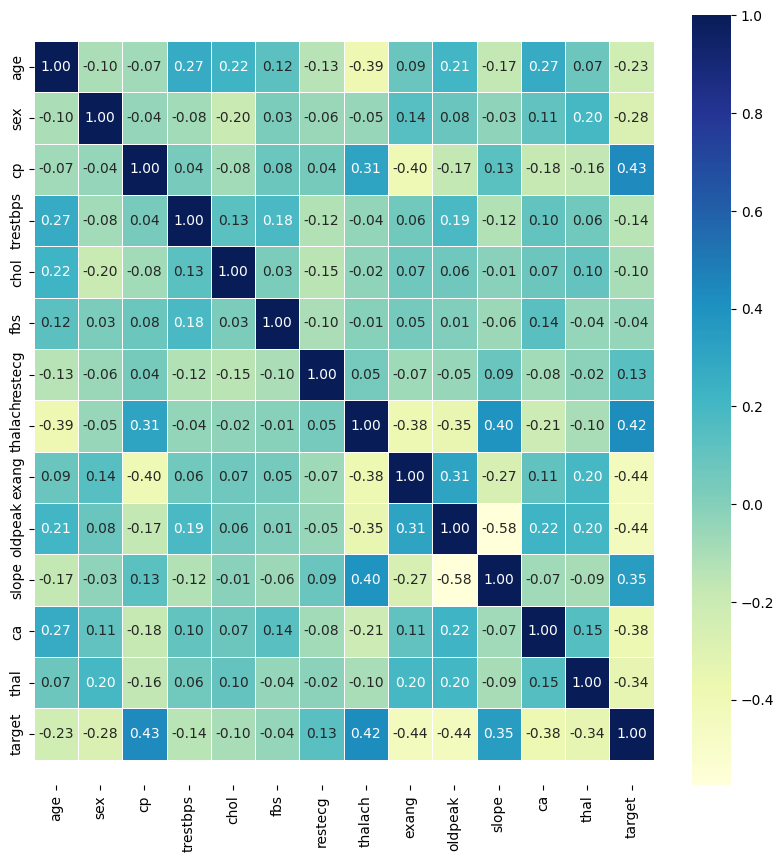

In [11]:
# Making correlation matrix better
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".2F",cmap="YlGnBu")

bottam,top=ax.get_ylim()
ax.set_ylim(bottam+0.5,top-0.5)

In [12]:
# Modelling
#Splitting the data
x=df.drop("target",axis=1)
y=df["target"]

np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
# Putting models in dictionery
models={"Logistic Regression": LogisticRegression(),"KNN":KNeighborsClassifier(),"Random Forest":RandomForestClassifier()}

In [14]:
# Creating a function to fit and score model
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [15]:
model_scores=fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
model_scores

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

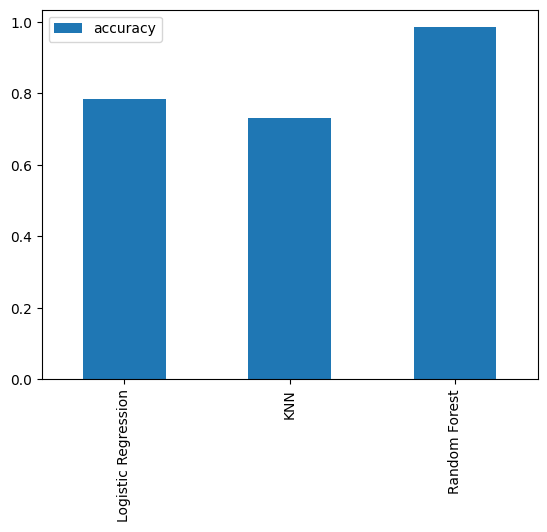

In [16]:
# Model Comparison
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Maximum KNN score on test data:98.536585%


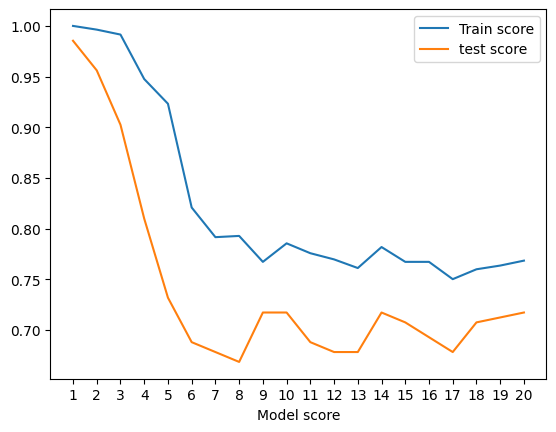

In [17]:
#Hyperparamter Tuning
train_scores=[]
test_scores=[]

#Creating a list of different value of n neighbours
neighbors=range(1,21)
KNN=KNeighborsClassifier()

for i in neighbors:
    KNN.set_params(n_neighbors=i)
    KNN.fit(x_train,y_train)
    train_scores.append(KNN.score(x_train,y_train))
    test_scores.append(KNN.score(x_test,y_test))

plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Model score")
plt.legend()
print(f"Maximum KNN score on test data:{max(test_scores)*100:2f}%")

In [18]:
#HyperParameter tunning with RandomisedSearchCV
#creating a hyperparameter grid for LogisticRegresion
log_reg_grid={"C":np.logspace(-4,4,20),"solver":["liblinear"]}

#Create hyperParameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,100,50), "max_depth":[None,3,5,10],"min_samples_split":np.arange(2,20,2),"min_samples_leaf":np.arange(1,20,2)}
np.arange(10,1000,50)
# Tune logistic regression
np.random.seed(42)

#Setup random hyperparameter search for logistic Regressor
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

# Fit random hyperparameter search model for logistic regression
rs_log_reg.fit(x_train,y_train)
best_param=rs_log_reg.best_params_     
rs_log_reg.score(x_test,y_test)
best_param

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'solver': 'liblinear', 'C': 1.623776739188721}

In [19]:
#Set up random seed
np.random.seed(42)
#Set up random hyperparameter search for RandomForestClassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)

# Fit 
rs_rf.fit(x_train,y_train)

#Evaluate the Randomised Search RandomForestClassifier model
rs_rf.score(x_test,y_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.9024390243902439

In [20]:
## HyperParametre tuning with GridSearchCv

# Different hyperparameter for our LogisticRegression Model
log_reg_grid={"C":np.logspace(-4,4,30),"solver":["liblinear"]}

#Setup grid Hyperparameter search for LogisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

#Fit grid hyperparameter search model
gs_log_reg.fit(x_train,y_train);

#Best Param
best=gs_log_reg.best_params_
best              

# Test
gs_log_reg.score(x_test,y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.7853658536585366

In [21]:
## Evaluating our tuned machine learning classifier beyond accuracy

#Make predictions with tunned model
y_preds=gs_log_reg.predict(x_test)
y_preds

#Import Roc curve from Scikit Learn

# Import ROC CURVE and Calculate AUC Metric
# Predict probabilities for the positive class (usually class 1)
y_probs = gs_log_reg.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Confusion Matrix 
print(confusion_matrix(y_test,y_preds))
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,clear=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    bottom,top=ax.get_ylim()
    ax.set_ylim(bottam+0.5,top-0.5)
    plot_conf_mat(y_test,y_preds)

[[71 31]
 [13 90]]


In [22]:
# lets get a classification report as well as cross validation precursion recall and f1 score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



In [23]:
## Claculate evalution metrices using cross validation

# Check best hyperparamters
best_parameters=gs_log_reg.best_params_
best_parameters

# Create a new Classifier with best parameters
clf=LogisticRegression(C=1.3738237958832638,solver="liblinear")

# Cross Validation accuracy
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8478048780487806

In [24]:
# cross val precision
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8226314773669621

In [25]:
# Cross vall recall
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.8974303683737646

In [26]:
# Cross f1
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8583430306540801

<Axes: title={'center': 'Cross-validated Classifications Metrices'}>

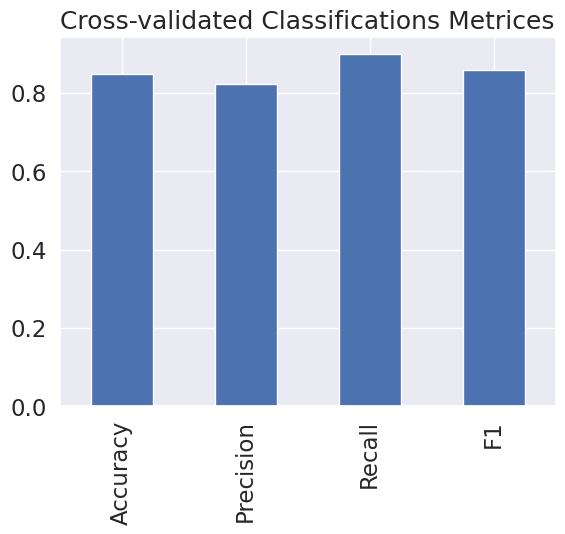

In [27]:
# visualize cross validated metrices
cv_metrices=pd.DataFrame({"Accuracy":cv_acc,"Precision":cv_precision,"Recall":cv_recall,"F1":cv_f1},index=[0])

cv_metrices.T.plot.bar(title="Cross-validated Classifications Metrices", legend=False)


In [28]:
# Fit an instense of logistic Regression
best_p=gs_log_reg.best_params_

clf=LogisticRegression(C=1.3738237958832638, solver="liblinear")
clf.fit(x_train,y_train)


LogisticRegression(C=1.3738237958832638, solver='liblinear')

In [29]:
# check coef
clf.coef_

array([[ 0.01309904, -1.67105374,  0.84838512, -0.01559894, -0.00822208,
        -0.1934892 ,  0.320036  ,  0.03491506, -0.78708421, -0.64712509,
         0.5663522 , -0.81344941, -1.03187889]])

In [30]:
# Match coef of feature to coloums
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.013099042357893961,
 'sex': -1.6710537369887302,
 'cp': 0.8483851220724015,
 'trestbps': -0.015598939588830223,
 'chol': -0.008222084481241142,
 'fbs': -0.19348920494110747,
 'restecg': 0.3200360028461989,
 'thalach': 0.03491505519433211,
 'exang': -0.7870842148762902,
 'oldpeak': -0.6471250874254243,
 'slope': 0.5663522012862804,
 'ca': -0.8134494053973746,
 'thal': -1.0318788894211315}

target,0,1
sex,,
0,86,226
1,413,300


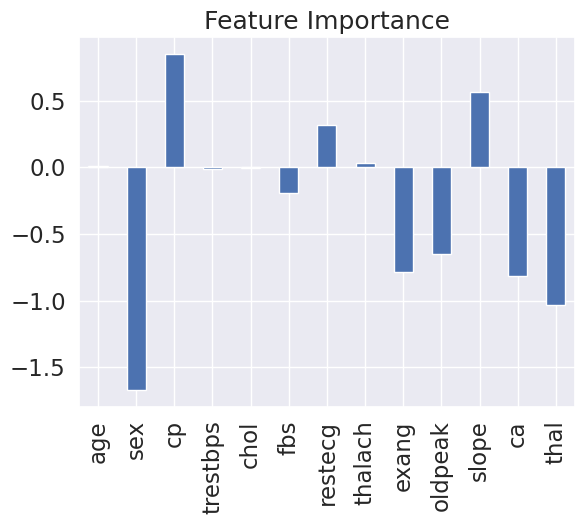

In [31]:
# Visualize Feature Importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);
pd.crosstab(df["sex"],df["target"])